In [48]:
import qiskit

In [49]:
qiskit.__version__

'1.1.0'

In [50]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",token="IWANTTOSHOWYOUBUTICANNOT")

IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [ ]:
# QiskitRuntimeService.save_account(channel="ibm_quantum",token="IWANTTOSHOWYOUBUTICANNOT")

In [ ]:
backend = service.backend(name="ibm_brisbane")

In [ ]:
backend.num_qubits

# map the porblem

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw(output="mpl")

In [ ]:
from qiskit.quantum_info import Pauli
ZZ=Pauli('ZZ')
ZI=Pauli('ZI')
IZ=Pauli('IZ')
XX=Pauli('XX')
XI=Pauli('XI')
IX=Pauli('IX')
observables=[ZZ, ZI, IZ, XX, XI, IX]


In [51]:
from qiskit.providers import job
from qiskit_aer.primitives import Estimator
estimator = Estimator()
job = estimator.run([qc]* len(observables), observables)
job.result()


EstimatorResult(values=array([ 1.        , -0.03710938, -0.03710938,  1.        ,  0.0078125 ,
        0.0078125 ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000437709, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.004018125, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 8192, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9986228942871094, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000437709, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0

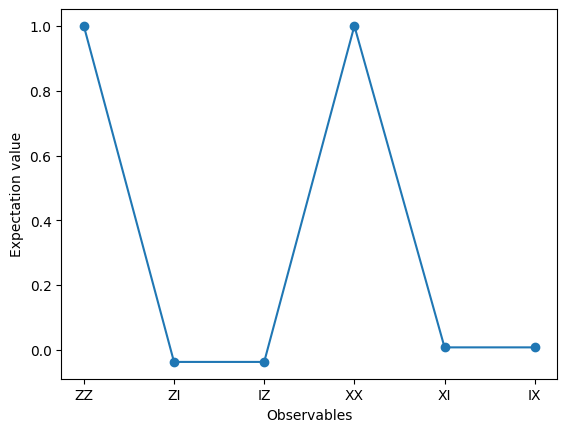

In [52]:
import matplotlib.pyplot as plt
data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values
plt.plot(data,values,'-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()